In [29]:
# Initial 
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import datetime as dt
#import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#import cufflinks as cf
import alpaca_trade_api as tradeapi
import hvplot.pandas
%matplotlib inline
#cf.go_offline()

In [30]:
load_dotenv()

True

In [31]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [32]:
# Create the Alpaca API Object
alpaca = tradeapi.REST(
alpaca_api_key,
alpaca_secret_key,
api_version="v2"

)

In [33]:
# format current date as ISO format
start = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()


In [34]:
#create top 10 nasdaq stock tickers
Stock_top10_tickers = ['AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML']


In [35]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"


In [36]:
# Get current closing prices for tickers
nasdaq_portfolio_df= alpaca.get_bars(
    Stock_top10_tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
nasdaq_portfolio_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-01-04 05:00:00+00:00,133.56,133.6116,126.760,129.41,143302687,1310228,129.732580,AAPL
2021-01-05 05:00:00+00:00,128.98,131.7400,128.430,131.01,97667342,707584,130.717944,AAPL
2021-01-06 05:00:00+00:00,127.53,131.0499,126.382,126.60,155104120,1202580,128.350036,AAPL
2021-01-07 05:00:00+00:00,128.38,131.6300,127.860,130.92,109581117,718363,130.153889,AAPL
2021-01-08 05:00:00+00:00,132.50,132.6300,130.230,132.05,105158675,800071,131.565744,AAPL


In [37]:
stocks_total_perf = pd.concat([nasdaq_portfolio_df], axis=1, join='outer', keys=['symbol'])
stocks_total_perf.head()

symbol                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  133.56  133.6116  126.760  129.41  143302687   
2021-01-05 05:00:00+00:00  128.98  131.7400  128.430  131.01   97667342   
2021-01-06 05:00:00+00:00  127.53  131.0499  126.382  126.60  155104120   
2021-01-07 05:00:00+00:00  128.38  131.6300  127.860  130.92  109581117   
2021-01-08 05:00:00+00:00  132.50  132.6300  130.230  132.05  105158675   

                                                          
                          trade_count        vwap symbol  
timestamp                                                 
2021-01-04 05:00:00+00:00     1310228  129.732580   AAPL  
2021-01-05 05:00:00+00:00      707584  130.717944   AAPL  
2021-01-06 05:00:00+00:00     1202580  128.350036   AAPL  
2021-01-07 05:00:00+00:00      718363  130.153889   AAPL  
2021-01-08 05:00:00+00:00      800071  131.565744   AAPL

In [38]:

# Drop the following columns 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'
columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap']
stock_df = nasdaq_portfolio_df.drop(columns, axis = 1)
stock_df.head()


,close,symbol
timestamp,,
2021-01-04 05:00:00+00:00,129.41,AAPL
2021-01-05 05:00:00+00:00,131.01,AAPL
2021-01-06 05:00:00+00:00,126.60,AAPL
2021-01-07 05:00:00+00:00,130.92,AAPL
2021-01-08 05:00:00+00:00,132.05,AAPL


In [39]:
#found data in the portfolio from June 1, 2021
nasdaq_performers_start_df = stock_df.loc['2021-06-01']
nasdaq_performers_start_df.reset_index(inplace=True)

nasdaq_performers_start_df

,timestamp,close,symbol
0,2021-06-01 04:00:00+00:00,124.28,AAPL
1,2021-06-01 04:00:00+00:00,144.31,ABNB
2,2021-06-01 04:00:00+00:00,163.69,ADI
3,2021-06-01 04:00:00+00:00,85.10,AEP
4,2021-06-01 04:00:00+00:00,593.48,ALGN
5,2021-06-01 04:00:00+00:00,138.21,AMAT
6,2021-06-01 04:00:00+00:00,80.81,AMD
7,2021-06-01 04:00:00+00:00,3218.65,AMZN
8,2021-06-01 04:00:00+00:00,335.99,ANSS
9,2021-06-01 04:00:00+00:00,671.80,ASML


In [40]:
#plot
nasdaq_pivot_start= nasdaq_performers_start_df.pivot_table(values="close", index="timestamp", columns="symbol")
nasdaq_plot_start = nasdaq_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title='Nasdaq Closing Values on 6/1/2021',
    rot=90
)
nasdaq_plot_start

:Bars   [timestamp,symbol]   (value)

In [41]:
#find how nasdaq portfolio did at the end of the year
nasdaq_performers_end_df = stock_df.loc['2021-12-31']
nasdaq_performers_end_df.reset_index(inplace=True)
nasdaq_performers_end_df

,timestamp,close,symbol
0,2021-12-31 05:00:00+00:00,177.57,AAPL
1,2021-12-31 05:00:00+00:00,166.49,ABNB
2,2021-12-31 05:00:00+00:00,175.77,ADI
3,2021-12-31 05:00:00+00:00,88.97,AEP
4,2021-12-31 05:00:00+00:00,657.18,ALGN
5,2021-12-31 05:00:00+00:00,157.36,AMAT
6,2021-12-31 05:00:00+00:00,143.90,AMD
7,2021-12-31 05:00:00+00:00,3334.34,AMZN
8,2021-12-31 05:00:00+00:00,401.12,ANSS
9,2021-12-31 05:00:00+00:00,796.14,ASML


In [42]:
nasdaq_pivot_end= nasdaq_performers_end_df.pivot_table(values="close", index="timestamp", columns="symbol")
nasdaq_plot_end = nasdaq_pivot_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value', 
    title='Nasdaq Closing Value on 12/31/2021'
)
nasdaq_plot_end

:Bars   [timestamp,symbol]   (value)

In [43]:
nasdaq_plot_start*nasdaq_plot_end

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [44]:
# create df containing info from '2021-06-01' through '2021-03-31'
nasdaq_timeframe = stock_df.loc['2021-06-01':'2021-12-31']
nasdaq_timeframe.reset_index(inplace=True)

nasdaq_timeframe

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,timestamp,close,symbol
0,2021-06-01 04:00:00+00:00,124.28,AAPL
1,2021-06-02 04:00:00+00:00,125.06,AAPL
2,2021-06-03 04:00:00+00:00,123.54,AAPL
3,2021-06-04 04:00:00+00:00,125.89,AAPL
4,2021-06-07 04:00:00+00:00,125.90,AAPL
...,...,...,...
1495,2021-12-27 05:00:00+00:00,811.43,ASML
1496,2021-12-28 05:00:00+00:00,804.77,ASML
1497,2021-12-29 05:00:00+00:00,801.98,ASML
1498,2021-12-30 05:00:00+00:00,800.22,ASML


In [45]:
# create a pivot table to plot the close over time
nasdaq_timeframe = nasdaq_timeframe.pivot_table(values="close", index="timestamp", columns="symbol")
nasdaq_timeframe.head()

symbol,AAPL,ABNB,ADI,AEP,ALGN,AMAT,AMD,AMZN,ANSS,ASML
timestamp,,,,,,,,,,
2021-06-01 04:00:00+00:00,124.28,144.31,163.69,85.10,593.48,138.21,80.81,3218.65,335.99,671.80
2021-06-02 04:00:00+00:00,125.06,151.00,164.50,85.65,575.49,139.01,81.97,3233.99,336.41,674.09
2021-06-03 04:00:00+00:00,123.54,144.19,162.07,85.96,566.96,136.38,80.28,3187.01,329.30,665.89
2021-06-04 04:00:00+00:00,125.89,150.73,165.58,86.03,582.35,139.85,81.58,3206.22,338.78,683.30
2021-06-07 04:00:00+00:00,125.90,148.97,164.48,85.67,580.27,138.97,81.35,3198.01,328.57,681.98


In [46]:
#plot
nasdaq_timeframe.hvplot(
    xlabel='DATE',
    ylabel='Closing Price',
    title='Closing Prices Nasdaq Portfolio 6/1/2021 - 12/31/2021',
    figsize=[20,10]
)

:NdOverlay   [symbol]
   :Curve   [timestamp]   (value)

In [47]:
#find value of investment from 6/1/2021 to 12/31/2021 for Nasdaq portfolio
initial_investment = 10000

nasdaq_performers_start_df['share'] = (0.10*initial_investment)
nasdaq_performers_start_df['share'] = ((0.10*initial_investment)/nasdaq_performers_start_df['close'])

nasdaq_performers_start_df['value'] = nasdaq_performers_start_df['share'] * nasdaq_performers_start_df['close']


C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [48]:
#display df
nasdaq_performers_start_df.head()

,timestamp,close,symbol,share,value
0,2021-06-01 04:00:00+00:00,124.28,AAPL,8.046347,1000.0
1,2021-06-01 04:00:00+00:00,144.31,ABNB,6.929527,1000.0
2,2021-06-01 04:00:00+00:00,163.69,ADI,6.109109,1000.0
3,2021-06-01 04:00:00+00:00,85.10,AEP,11.750881,1000.0
4,2021-06-01 04:00:00+00:00,593.48,ALGN,1.684977,1000.0


In [49]:
#display sum of value of portfolio on June 1, 2021 
sum_nasdaq_portfolio_start = nasdaq_performers_start_df['value'].sum()

print(f'The total value of the portfolio on June 1, 2021 was {sum_nasdaq_portfolio_start}')

The total value of the portfolio on June 1, 2021 was 10000.0


In [50]:
#setup df to plot value and symbol
columns=['close','share']
nasdaq_values_start = nasdaq_performers_start_df.drop(columns,axis=1)
nasdaq_values_start = nasdaq_values_start.pivot_table(values="value", index="timestamp", columns="symbol")

In [51]:
#display df
nasdaq_values_start

symbol,AAPL,ABNB,ADI,AEP,ALGN,AMAT,AMD,AMZN,ANSS,ASML
timestamp,,,,,,,,,,
2021-06-01 04:00:00+00:00,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [52]:
#plot
nasdaq_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Nasdaq Portfolio on 6/1/2021'
)

:Bars   [timestamp,symbol]   (value)

In [53]:
#create columns for shares and calculate value on 12/31/2021
nasdaq_performers_end_df['share'] = nasdaq_performers_start_df['share']
nasdaq_performers_end_df['value']=nasdaq_performers_end_df['share'] * nasdaq_performers_end_df['close']


C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
#display df
nasdaq_performers_end_df

,timestamp,close,symbol,share,value
0,2021-12-31 05:00:00+00:00,177.57,AAPL,8.046347,1428.789829
1,2021-12-31 05:00:00+00:00,166.49,ABNB,6.929527,1153.696903
2,2021-12-31 05:00:00+00:00,175.77,ADI,6.109109,1073.798033
3,2021-12-31 05:00:00+00:00,88.97,AEP,11.750881,1045.475911
4,2021-12-31 05:00:00+00:00,657.18,ALGN,1.684977,1107.333019
5,2021-12-31 05:00:00+00:00,157.36,AMAT,7.235366,1138.557268
6,2021-12-31 05:00:00+00:00,143.90,AMD,12.374706,1780.720208
7,2021-12-31 05:00:00+00:00,3334.34,AMZN,0.310689,1035.943641
8,2021-12-31 05:00:00+00:00,401.12,ANSS,2.976279,1193.845055
9,2021-12-31 05:00:00+00:00,796.14,ASML,1.488538,1185.084847


In [55]:
#display sum of value of nasdaq portfolio on December 31, 2021 
sum_nasdaq_portfolio_end= nasdaq_performers_end_df['value'].sum()

print(f'The total value of the nasdaq portfolio on December 31, 2021 was {sum_nasdaq_portfolio_end}')

The total value of the nasdaq portfolio on December 31, 2021 was 12143.244712664728


In [56]:
#setup df to plot value and symbol
columns=['close','share']
nasdaq_values_end = nasdaq_performers_end_df.drop(columns,axis=1)
nasdaq_values_end = nasdaq_values_end.pivot_table(values="value", index="timestamp", columns="symbol")

In [57]:
#display values df
nasdaq_values_end

symbol,AAPL,ABNB,ADI,AEP,ALGN,AMAT,AMD,AMZN,ANSS,ASML
timestamp,,,,,,,,,,
2021-12-31 05:00:00+00:00,1428.789829,1153.696903,1073.798033,1045.475911,1107.333019,1138.557268,1780.720208,1035.943641,1193.845055,1185.084847


In [58]:
#plot Nasdaq portfolio value on 12/31/2021
nasdaq_values_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Nasdaq Portfolio on 12/31/2021'
)

:Bars   [timestamp,symbol]   (value)

In [59]:
nasdaq_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    rot=90,
    title='Nasdaq Portfolio'
)*nasdaq_values_end.hvplot.bar()

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [70]:
#find change in crypto portfolio after six months
nasdaq_portfolio_total=sum_nasdaq_portfolio_end-sum_nasdaq_portfolio_start

print(f'The total of the nasdaq portfolio after six months = {nasdaq_portfolio_total}')

The total of the nasdaq portfolio after six months = 2143.2447126647276


In [61]:
#create a df to calculate daily change from 6/1/2021 to 12/31/2021
#'AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML'
AAPL = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AAPL'].drop('symbol', axis=1)
AMZN = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AMZN'].drop('symbol', axis=1)
AMD = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AMD'].drop('symbol', axis=1)
ABNB = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ABNB'].drop('symbol', axis=1)
ALGN = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ALGN'].drop('symbol', axis=1)
AEP = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AEP'].drop('symbol', axis=1)
ADI = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ADI'].drop('symbol', axis=1)
ANSS = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ANSS'].drop('symbol', axis=1)
AMAT = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AMAT'].drop('symbol', axis=1)
ASML = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ASML'].drop('symbol', axis=1)

df_nasdaq_portfolio = pd.concat([AAPL,AMZN,AMD,ABNB,ALGN,AEP,ADI,ANSS,AMAT,ASML],axis=1, keys=['AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML'])

In [62]:
#Display df
df_nasdaq_portfolio.head()


AAPL                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  133.56  133.6116  126.760  129.41  143302687   
2021-01-05 05:00:00+00:00  128.98  131.7400  128.430  131.01   97667342   
2021-01-06 05:00:00+00:00  127.53  131.0499  126.382  126.60  155104120   
2021-01-07 05:00:00+00:00  128.38  131.6300  127.860  130.92  109581117   
2021-01-08 05:00:00+00:00  132.50  132.6300  130.230  132.05  105158675   

                                                      AMZN                     \
                          trade_count        vwap     open      high      low   
timestamp                                                                       
2021-01-04 05:00:00+00:00     1310228  129.732580  3270.00  3272.000  3144.02   
2021-01-05 05:00:00+00:00      707584  130.717944  3166.01  3223.380  3165.06   
2021-01-06 05:00:00+00:00     1202580  128.350036  3146.89  3197.509  3131.16   
2021-01-07 05:00:00+00:00      718363  130.153889  3156.48  3208.542  3155.00   
2021-01-08 05:00:00+00:00      800071  131.565744  3182.20  3190.640  3142.20   

                           ...     AMAT                           ASML  \
                           ...   volume trade_count       vwap    open   
timestamp                  ...                                           
2021-01-04 05:00:00+00:00  ...  8449949       79765  87.348187  499.99   
2021-01-05 05:00:00+00:00  ...  6987214       68208  88.879956  494.16   
2021-01-06 05:00:00+00:00  ...  9817978       94740  90.885700  491.90   
2021-01-07 05:00:00+00:00  ...  8784079       84573  94.192034  495.97   
2021-01-08 05:00:00+00:00  ...  9059720       94615  96.186068  512.59   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2021-01-04 05:00:00+00:00  504.7500  490.71  500.00  1527642       27183   
2021-01-05 05:00:00+00:00  505.3600  493.89  505.36  1029887       18010   
2021-01-06 05:00:00+00:00  499.8449  489.74  490.22   978008       22579   
2021-01-07 05:00:00+00:00  503.2200  495.52  501.43   936230       17533   
2021-01-08 05:00:00+00:00  514.2800  501.71  508.74   734573       14881   

                                       
                                 vwap  
timestamp                              
2021-01-04 05:00:00+00:00  499.055421  
2021-01-05 05:00:00+00:00  500.101039  
2021-01-06 05:00:00+00:00  494.623156  
2021-01-07 05:00:00+00:00  499.083485  
2021-01-08 05:00:00+00:00  508.309631  

[5 rows x 70 columns]

In [63]:
#create df to find daily returns
df_nasdaq_portfolio = df_nasdaq_portfolio.loc['2021-06-01':'2021-12-31']

df_nasdaq_portfolio.head()

AAPL                                      \
                             open    high       low   close    volume   
timestamp                                                               
2021-06-01 04:00:00+00:00  125.15  125.35  123.9400  124.28  68136772   
2021-06-02 04:00:00+00:00  124.19  125.24  124.0500  125.06  59278133   
2021-06-03 04:00:00+00:00  124.66  124.85  123.1300  123.54  76227069   
2021-06-04 04:00:00+00:00  124.01  126.16  123.8500  125.89  75167991   
2021-06-07 04:00:00+00:00  126.20  126.32  124.8321  125.90  71057300   

                                                      AMZN                     \
                          trade_count        vwap     open      high      low   
timestamp                                                                       
2021-06-01 04:00:00+00:00      501108  124.592356  3242.65  3250.980  3209.06   
2021-06-02 04:00:00+00:00      461406  124.768610  3222.00  3235.000  3208.00   
2021-06-03 04:00:00+00:00      562239  123.771424  3204.23  3214.435  3184.03   
2021-06-04 04:00:00+00:00      467755  125.367963  3212.00  3221.000  3198.81   
2021-06-07 04:00:00+00:00      504252  125.369057  3196.68  3208.000  3172.20   

                           ...     AMAT                            ASML  \
                           ...   volume trade_count        vwap    open   
timestamp                  ...                                            
2021-06-01 04:00:00+00:00  ...  8838570       96756  138.902007  684.74   
2021-06-02 04:00:00+00:00  ...  6400294       77622  138.933750  671.02   
2021-06-03 04:00:00+00:00  ...  8191867       84352  136.887332  667.35   
2021-06-04 04:00:00+00:00  ...  6662483       75859  139.751139  674.63   
2021-06-07 04:00:00+00:00  ...  5944125       63177  138.986987  680.18   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2021-06-01 04:00:00+00:00  688.09  668.5201  671.80  1291932       28800   
2021-06-02 04:00:00+00:00  678.73  668.7700  674.09   596714       18773   
2021-06-03 04:00:00+00:00  670.41  660.1100  665.89   611680       18690   
2021-06-04 04:00:00+00:00  684.02  673.0900  683.30   531025       16254   
2021-06-07 04:00:00+00:00  684.41  676.4800  681.98   594061       16753   

                                       
                                 vwap  
timestamp                              
2021-06-01 04:00:00+00:00  674.152058  
2021-06-02 04:00:00+00:00  674.025155  
2021-06-03 04:00:00+00:00  666.522041  
2021-06-04 04:00:00+00:00  680.685076  
2021-06-07 04:00:00+00:00  681.436839  

[5 rows x 70 columns]

In [64]:
#create empty df for closing prices
df_closing_prices_nasdaq = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in Stock_top10_tickers:
    df_closing_prices_nasdaq[ticker] = df_nasdaq_portfolio[ticker]["close"]

# Drop the time component of the date
df_closing_prices_nasdaq.index = df_closing_prices_nasdaq.index.date

#display df
df_closing_prices_nasdaq.head()

,AAPL,AMZN,AMD,ABNB,ALGN,AEP,ADI,ANSS,AMAT,ASML
2021-06-01,124.28,3218.65,80.81,144.31,593.48,85.10,163.69,335.99,138.21,671.80
2021-06-02,125.06,3233.99,81.97,151.00,575.49,85.65,164.50,336.41,139.01,674.09
2021-06-03,123.54,3187.01,80.28,144.19,566.96,85.96,162.07,329.30,136.38,665.89
2021-06-04,125.89,3206.22,81.58,150.73,582.35,86.03,165.58,338.78,139.85,683.30
2021-06-07,125.90,3198.01,81.35,148.97,580.27,85.67,164.48,328.57,138.97,681.98


In [65]:
# Compute daily returns
df_daily_returns_nasdaq = df_closing_prices_nasdaq.pct_change().dropna()

# Display sample data
df_daily_returns_nasdaq.head()

,AAPL,AMZN,AMD,ABNB,ALGN,AEP,ADI,ANSS,AMAT,ASML
2021-06-02,0.006276,0.004766,0.014355,0.046359,-0.030313,0.006463,0.004948,0.001250,0.005788,0.003409
2021-06-03,-0.012154,-0.014527,-0.020617,-0.045099,-0.014822,0.003619,-0.014772,-0.021135,-0.018920,-0.012165
2021-06-04,0.019022,0.006028,0.016193,0.045357,0.027145,0.000814,0.021657,0.028788,0.025444,0.026145
2021-06-07,0.000079,-0.002561,-0.002819,-0.011677,-0.003572,-0.004185,-0.006643,-0.030138,-0.006292,-0.001932
2021-06-08,0.006672,0.020669,-0.005655,-0.013157,0.016354,-0.031516,0.002614,0.002496,-0.022379,-0.001833


In [66]:
#plot daily return of nasdaq portfolio
df_daily_returns_nasdaq.hvplot(
    xlabel='DATE',
    ylabel='Daily Return',
    title='The Daily Returns of Nasdaq Portfolio 6/1/2021 - 12/31/2021',
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

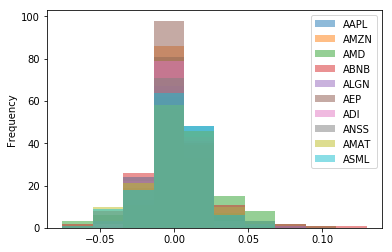

In [67]:
# Visualize the distribution of daily returns across all cryptos using a histogram plot
df_daily_returns_nasdaq.plot.hist(alpha=0.5)

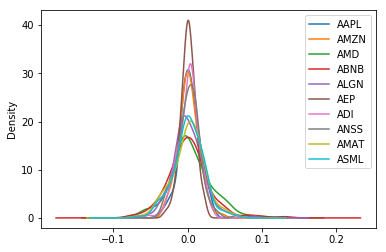

In [68]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns_nasdaq.plot.density()